### Examples on how to prepared the data for the NN using Jet Images

#### 1. Quark-Gluon Tagging

In [29]:
import numpy as np
import pandas as pd
from src.Preprocessing.JetPreprocessing import PreprocessingJetImages
from src.Preprocessing.GenerateLabels import create_jet_labels_one_column_per_category
from sklearn.utils import shuffle

In [7]:
# reading the data files for trainning 
data_quark = pd.read_csv("Trainning/q_jets.csv", header=None)
data_gluon = pd.read_csv("Trainning/g_jets.csv", header=None)

# Setting up the images using the Preprocessing class
jet_image_preprocessing = PreprocessingJetImages(phi_range=(-0.4, 0.4), eta_range=(-0.4, 0.4), n_bins_phi=16, n_bins_eta=16)

# getting the jet images (Remeber that we must pass the data as a numpy array)
quark_images = jet_image_preprocessing.transform(X=data_quark.to_numpy())
gluon_images = jet_image_preprocessing.transform(X=data_gluon.to_numpy())

In [30]:
# creating the data with all the images 
all_jet_images = np.vstack((quark_images, gluon_images))
# creating the labels, the first tuple telss the initial and final index of the first jet type, and so on.
jet_labels = create_jet_labels_one_column_per_category([(0, len(quark_images) - 1), (len(quark_images), len(all_jet_images) - 1)])
# shuffling the data
X, y = shuffle(all_jet_images, jet_labels, random_state=0)

In [31]:
print(f"Shape labels: {jet_labels.shape}")
print(f"Shape data: {all_jet_images.shape}")

Shape labels: (251379, 2)
Shape data: (251379, 256)


#### 2. Top-tagging

In [33]:
# reading the top quark data 
data_top = pd.read_csv("Trainning/t_jets.csv", header=None)

# using the same Preprocessing object
top_images = jet_image_preprocessing.transform(X=data_top.to_numpy())

# the full dataset for the NN must be filled with half top images and half non-top images (quark and gluon images)
all_jet_images_top_tag = np.vstack([top_images, all_jet_images[:int(len(all_jet_images)/2)]])
jet_images_top_tag_labels = create_jet_labels_one_column_per_category([(0, len(top_images) - 1), (len(top_images), len(all_jet_images_top_tag) - 1)])

# shuffling the data
X_top, y_top = shuffle(all_jet_images_top_tag, jet_images_top_tag_labels, random_state=0)

In [35]:
print(f"Shape labels: {y_top.shape}")
print(f"Shape data: {X_top.shape}")

Shape labels: (254254, 2)
Shape data: (254254, 256)


#### Checking some images

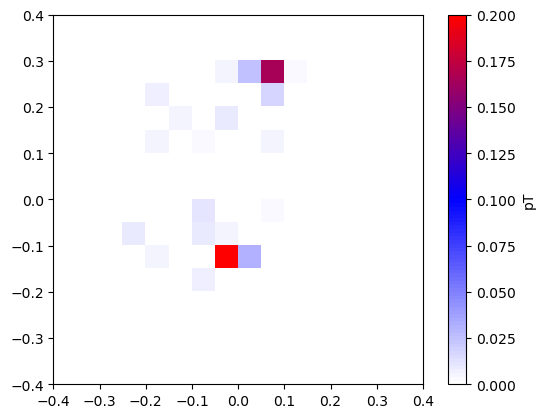

In [37]:
# checking some images 
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Create a custom colormap that transitions from white to blue to red
colors = [(1, 1, 1), (0, 0, 1), (1, 0, 0)]  # White, Blue, Red
n_bins = 100  # Number of bins for interpolation
custom_cmap = LinearSegmentedColormap.from_list('white_blue_red', colors, N=n_bins)

plt.imshow(top_images[0].reshape((16, 16)), cmap=custom_cmap,  extent=(-0.4, 0.4, -0.4, 0.4), vmin=0, vmax=0.2)
plt.colorbar(label='pT')